<a href="https://colab.research.google.com/github/WillianXG/Projeto_Em_grupo-Modulo-3/blob/respondendo-qst-5/grupoModulo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dados Criptomoedas

In [1]:
import pandas as pd
import requests
from matplotlib import pyplot as plt
import seaborn as sns

#Importando csv do github
aave = pd.read_csv('https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Aave.csv')
binance=pd.read_csv('https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_BinanceCoin.csv')
bitcoin=pd.read_csv('https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Bitcoin.csv')
cardano=pd.read_csv('https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Cardano.csv')
chainlink=pd.read_csv('https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_ChainLink.csv')
cosmos=pd.read_csv('https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Cosmos.csv')
cryptocom=pd.read_csv('https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_CryptocomCoin.csv')
dogecoin=pd.read_csv('https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Dogecoin.csv')
eos=pd.read_csv('https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_EOS.csv')
ethereum=pd.read_csv('https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Ethereum.csv')
iota=pd.read_csv('https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Iota.csv')
litecoin=pd.read_csv('https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Litecoin.csv')
monero=pd.read_csv('https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Monero.csv')
nem=pd.read_csv('https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_NEM.csv')
polkadot=pd.read_csv('https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Polkadot.csv')
solana=pd.read_csv('https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Solana.csv')
stellar=pd.read_csv('https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Stellar.csv')
tether=pd.read_csv('https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Tether.csv')
tron=pd.read_csv('https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Tron.csv')
usd=pd.read_csv('https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_USDCoin.csv')
uniswap=pd.read_csv('https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Uniswap.csv')
wrappedBitcoin=pd.read_csv('https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_WrappedBitcoin.csv')
xrp=pd.read_csv('https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_XRP.csv')
#Unificando todos os dataframe
criptomoedas=[aave, binance, bitcoin, cardano, chainlink, cosmos, cryptocom, dogecoin, eos, ethereum, iota, litecoin, monero, nem, polkadot, solana, stellar, tether, tron, usd, uniswap, wrappedBitcoin, xrp]
#Funções
def data_process(df):
    df['Year'] = df['Date'].dt.year
    return df

def calculate_annual(df):
    df_grouped = df.groupby('Year')['Close'].agg(['first', 'last'])
    df_grouped['Change'] = (df_grouped['last'] - df_grouped['first']) / df_grouped['first']
    df_grouped = df_grouped.rename(columns={'first': 'Primeira', 'last': 'Última', 'Change': 'Diferença'})
    return df_grouped

def find_extremes(df):
    max_val_year = df['Diferença'].idxmax()
    min_val_year = df['Diferença'].idxmin()
    return max_val_year, df.loc[max_val_year, 'Diferença'], min_val_year, df.loc[min_val_year, 'Diferença']








# Analise de Dados


In [2]:
criptomoedaMedia=[]
for indice, criptomoeda in enumerate(criptomoedas):
  criptomoeda['Date'] = pd.to_datetime(criptomoeda['Date'])
  # Corrigindo possíveis
  # 1. Verificar valores ausentes
  valoresEncontrados = criptomoeda.isnull().sum()
  # Exibindo valores nulos
  print("\nValores Nulos:\n", valoresEncontrados[valoresEncontrados > 0]) if valoresEncontrados.any() else print("Nenhum valor nulo encontrado.")
  # 2. Verificar erros de tipo de dados na coluna 'Date'
  tipo = pd.DataFrame(criptomoeda.dtypes)
  #   # Exibindo tipos antes da correção
  print(tipo)
  tipo = pd.DataFrame(criptomoeda.dtypes)
  criptomoeda = criptomoeda.astype({col: 'string' for col in criptomoeda.select_dtypes(include='object').columns})
  # # Exibindo tipos pós correção
  # print('\n\n\n')
  # print(criptomoeda['Name'][0])
  # tipo = pd.DataFrame(criptomoeda.dtypes)
  # print(tipo)
  # print('\n\n\n')
  #3. Verificar duplicatas
  duplicatas = criptomoeda.duplicated().sum()
  print(duplicatas)
  if duplicatas > 0:
       criptomoeda=criptomoeda.drop_duplicates()
       print("\nDuplicate Rows Found: ", duplicatas)
  else: print("Sem Colunas duplicadas.")
  duplicatas = criptomoeda.duplicated().sum()
  print(f'Depois de corrigir \n\n{duplicatas}')
  if duplicatas > 0:
       print("\nDuplicate Rows Found: ", duplicatas)
  else: print("Sem Colunas duplicadas.")

  # # 4. (Opcional) Verificar outliers na coluna 'Close'
  # if 'Close' in criptomoeda.columns:
  #     q1 = criptomoeda['Close'].quantile(0.25)
  #     q3 = criptomoeda['Close'].quantile(0.75)
  #     iqr = q3 - q1
  #     lower_bound = q1 - 1.5 * iqr
  #     upper_bound = q3 + 1.5 * iqr
  #     outliers = criptomoeda[(criptomoeda['Close'] < lower_bound) | (criptomoeda['Close'] > upper_bound)]
  #     if not outliers.empty:
  #         print("\nOutliers Found:\n", outliers[['Date', 'Close']]
  # Corrigir os problemas encontrado
  # Remover linhas onde a data não pôde ser convertida
  #criptomoeda = criptomoeda.dropna(subset=['Date']
  # Preencher valores ausentes

    # Calculando valores das perguntas
        #1. Como se comportaram os valores para todas as criptomoedas? Os valores tiveram uma tendência de queda ou de aumento?
        #2. Quais os valores médios para todas as criptomoedas?
        #3. Em quais anos houve maiores quedas e valorizações?
criptomoedas = [data_process(df) for df in criptomoedas]
annual_changes = [calculate_annual(df) for df in criptomoedas]
extremes = [find_extremes(df) for df in annual_changes]
result_dataframes = []
for indice, crypto in enumerate(criptomoedas):
    max_year, max_change, min_year, min_change = extremes[indice]
    df = pd.DataFrame({
        'Crypto': [crypto],
        'Melhor Ano': [max_year],
        'Maior valorização': [max_change],
        'Pior Ano': [min_year],
        'Menor valorizaçao': [min_change]
    })
    result_dataframes.append(df)

for crypto in result_dataframes:
    df = pd.concat(result_dataframes, ignore_index=True)
    df = pd.DataFrame(df)

        #4. Existe alguma tendência de aumento ou queda dos valores pelo dia da semana?
        #5. Qual moeda se mostra mais interessante em relação à valorização pela análise da série histórica?
        #6. Qual moeda se mostra menos interessante em relação à valorização pela análise da série histórica?
        #7. Existe correlação entre os valores para todas as criptomoedas?
        #8.
        #9.
    # Repondendo as perguntas
        #1. Como se comportaram os valores para todas as criptomoedas? Os valores tiveram uma tendência de queda ou de aumento?
        #2. Quais os valores médios para todas as criptomoedas?
        #3. Em quais anos houve maiores quedas e valorizações?
print(df)
        #4. Existe alguma tendência de aumento ou queda dos valores pelo dia da semana?
        #5. Qual moeda se mostra mais interessante em relação à valorização pela análise da série histórica?
        #6. Qual moeda se mostra menos interessante em relação à valorização pela análise da série histórica?
        #7. Existe correlação entre os valores para todas as criptomoedas?
        #8.
        #9.

Nenhum valor nulo encontrado.
                        0
SNo                 int64
Name               object
Symbol             object
Date       datetime64[ns]
High              float64
Low               float64
Open              float64
Close             float64
Volume            float64
Marketcap         float64
0
Sem Colunas duplicadas.
Depois de corrigir 

0
Sem Colunas duplicadas.
Nenhum valor nulo encontrado.
                        0
SNo                 int64
Name               object
Symbol             object
Date       datetime64[ns]
High              float64
Low               float64
Open              float64
Close             float64
Volume            float64
Marketcap         float64
0
Sem Colunas duplicadas.
Depois de corrigir 

0
Sem Colunas duplicadas.
Nenhum valor nulo encontrado.
                        0
SNo                 int64
Name               object
Symbol             object
Date       datetime64[ns]
High              float64
Low               float64
Open      

1. Como se comportaram os valores para todas as criptomoedas? Os valores tiveram uma
tendência de queda ou de aumento?
2. Quais os valores médios para todas as criptomoedas?
3. Em quais anos houve maiores quedas e valorizações?
4. Existe alguma tendência de aumento ou queda dos valores pelo dia da semana?
5. Qual moeda se mostra mais interessante em relação à valorização pela análise da série
histórica?
6. Qual moeda se mostra menos interessante em relação à valorização pela análise da série
histórica?
7. Existe correlação entre os valores para todas as criptomoedas?

# Quais os valores médios para todas as criptomoedas? *VALDEILSON*



In [13]:
# JUNTANDO TODOS OS CSVs EM APNES UM.


#listando o novo csv
csv_unico  = [
    'https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Aave.csv',
    'https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_BinanceCoin.csv',
    'https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Bitcoin.csv',
    'https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Cardano.csv',
    'https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_ChainLink.csv',
    'https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Cosmos.csv',
    'https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_CryptocomCoin.csv',
    'https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Dogecoin.csv',
    'https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_EOS.csv',
    'https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Ethereum.csv',
    'https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Iota.csv',
    'https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Litecoin.csv',
    'https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Monero.csv',
    'https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_NEM.csv',
    'https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Polkadot.csv',
    'https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Solana.csv',
    'https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Stellar.csv',
    'https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Tether.csv',
    'https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Tron.csv',
    'https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_USDCoin.csv',
    'https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Uniswap.csv',
    'https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_WrappedBitcoin.csv',
    'https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_XRP.csv'
]


li = []  #lista para armazenar o arquivo csv novo


# Gerando um DataFrame com uma função em loop

for url in csv_unico:
    df = pd.read_csv(url)
    li.append(df)

df_unico = pd.concat(li, axis=0, ignore_index=True)    # Realizando a concatenização
df_unico



# prompt: Quais os valores médios para todas as criptomoedas?

#df_unico['Date'] = pd.to_datetime(df_unico['Date'])
#df_unico = df_unico[(df_unico['Date'] >= '2020-01-01') & (df_unico['Date'] <= '2021-01-01')]

#media_por_moeda = df_unico.groupby('Name')['Close'].mean()
#media_por_moeda



def calcular_media_por_moeda(df, coluna_data='Date', coluna_nome='Name', coluna_valor='Close', data_inicio='2020-01-01', data_fim='2021-01-01'):

    df[coluna_data] = pd.to_datetime(df[coluna_data])

    df_filtrado = df[(df[coluna_data] >= data_inicio) & (df[coluna_data] <= data_fim)]

    media_por_moeda = df_filtrado.groupby(coluna_nome)[coluna_valor].mean()

    return media_por_moeda

media_por_moeda = calcular_media_por_moeda(df_unico)
media_por_moeda


Name
Aave                  61.664022
Binance Coin          21.350415
Bitcoin            11116.378080
Cardano                0.086795
Chainlink              7.428178
Cosmos                 4.126263
Crypto.com Coin        0.092467
Dogecoin               0.002743
EOS                    2.913525
Ethereum             307.542978
IOTA                   0.251735
Litecoin              56.243496
Monero                84.943611
NEM                    0.083275
Polkadot               4.822105
Solana                 1.700169
Stellar                0.082374
TRON                   0.020719
Tether                 1.001316
USD Coin               1.002074
Uniswap                3.508140
Wrapped Bitcoin    11134.258119
XRP                    0.258399
Name: Close, dtype: float64

# Qual moeda se mostra mais interessante em relação à valorização pela análise da série histórica? *VALDEILSON*


In [19]:
csv_unico  = [
    'https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Aave.csv',
    'https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_BinanceCoin.csv',
    'https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Bitcoin.csv',
    'https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Cardano.csv',
    'https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_ChainLink.csv',
    'https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Cosmos.csv',
    'https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_CryptocomCoin.csv',
    'https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Dogecoin.csv',
    'https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_EOS.csv',
    'https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Ethereum.csv',
    'https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Iota.csv',
    'https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Litecoin.csv',
    'https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Monero.csv',
    'https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_NEM.csv',
    'https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Polkadot.csv',
    'https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Solana.csv',
    'https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Stellar.csv',
    'https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Tether.csv',
    'https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Tron.csv',
    'https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_USDCoin.csv',
    'https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_Uniswap.csv',
    'https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_WrappedBitcoin.csv',
    'https://raw.githubusercontent.com/davidlgomes/modulo3AnaliseDados/main/coin_XRP.csv'
]

li = []  #lista para armazenar o arquivo csv novo


# Gerando um DataFrame com uma função em loop

for url in csv_unico:
    df = pd.read_csv(url)
    li.append(df)

df_unico = pd.concat(li, axis=0, ignore_index=True)    # Realizando a concatenização
df_unico

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Aave,AAVE,2020-10-05 23:59:59,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
1,2,Aave,AAVE,2020-10-06 23:59:59,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
2,3,Aave,AAVE,2020-10-07 23:59:59,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
3,4,Aave,AAVE,2020-10-08 23:59:59,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
4,5,Aave,AAVE,2020-10-09 23:59:59,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08
...,...,...,...,...,...,...,...,...,...,...
37077,2889,XRP,XRP,2021-07-02 23:59:59,0.667287,0.634726,0.659890,0.656763,2.061607e+09,3.030759e+10
37078,2890,XRP,XRP,2021-07-03 23:59:59,0.683677,0.644653,0.655639,0.672888,1.872820e+09,3.105172e+10
37079,2891,XRP,XRP,2021-07-04 23:59:59,0.707783,0.665802,0.673218,0.694945,1.885242e+09,3.206960e+10
37080,2892,XRP,XRP,2021-07-05 23:59:59,0.695653,0.648492,0.695653,0.654300,2.076373e+09,3.019395e+10


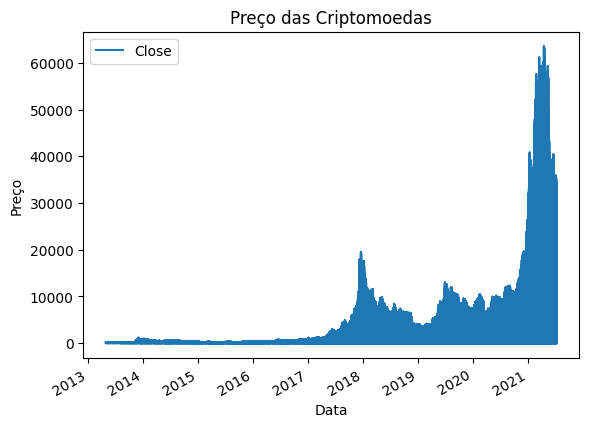

In [15]:
df_unico.head()

df_unico.plot(x= 'Date', y = 'Close', kind= 'line')
plt.xlabel('Data')
plt.ylabel('Preço')
plt.title('Preço das Criptomoedas')
plt.show()

In [16]:
df_unico["Retorno"]=df_unico["Close"].pct_change()
df_unico

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Retorno
0,1,Aave,AAVE,2020-10-05 23:59:59,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07,NaN
1,2,Aave,AAVE,2020-10-06 23:59:59,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07,-0.203266
2,3,Aave,AAVE,2020-10-07 23:59:59,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07,-0.054659
3,4,Aave,AAVE,2020-10-08 23:59:59,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08,0.091819
4,5,Aave,AAVE,2020-10-09 23:59:59,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08,0.069766
...,...,...,...,...,...,...,...,...,...,...,...
37077,2889,XRP,XRP,2021-07-02 23:59:59,0.667287,0.634726,0.659890,0.656763,2.061607e+09,3.030759e+10,-0.006681
37078,2890,XRP,XRP,2021-07-03 23:59:59,0.683677,0.644653,0.655639,0.672888,1.872820e+09,3.105172e+10,0.024553
37079,2891,XRP,XRP,2021-07-04 23:59:59,0.707783,0.665802,0.673218,0.694945,1.885242e+09,3.206960e+10,0.032780
37080,2892,XRP,XRP,2021-07-05 23:59:59,0.695653,0.648492,0.695653,0.654300,2.076373e+09,3.019395e+10,-0.058487


In [28]:
print(df[['Close', 'High', 'Low']].describe())

grouped_df = df.groupby('Name')[['Close', 'High', 'Low']]
stats_df = grouped_df.describe()
stats_df['Currency'] = grouped_df.first().index

# Transpor o DataFrame
stats_df_transposed = stats_df.T

# Exibir o resultado
print(stats_df_transposed)


             Close         High          Low
count  2893.000000  2893.000000  2893.000000
mean      0.234790     0.246591     0.222000
std       0.338629     0.365393     0.311581
min       0.002810     0.003082     0.002802
25%       0.007346     0.007531     0.007093
50%       0.182608     0.189184     0.176196
75%       0.312465     0.320751     0.303941
max       3.377810     3.841940     3.117340
Name                 XRP
Close    count    2893.0
         mean    0.23479
         std    0.338629
         min     0.00281
         25%    0.007346
         50%    0.182608
         75%    0.312465
         max     3.37781
High     count    2893.0
         mean   0.246591
         std    0.365393
         min    0.003082
         25%    0.007531
         50%    0.189184
         75%    0.320751
         max     3.84194
Low      count    2893.0
         mean      0.222
         std    0.311581
         min    0.002802
         25%    0.007093
         50%    0.176196
         75%    0.30


# Pergunta 3

## Em quais anos houve maiores quedas e valorizações?

In [6]:
def data_process(df):
    df['Year'] = df['Date'].dt.year
    return df

criptomoedas = [data_process(df) for df in criptomoedas]


def calculate_annual(df):
    df_grouped = df.groupby('Year')['Close'].agg(['first', 'last'])
    df_grouped['Change'] = (df_grouped['last'] - df_grouped['first']) / df_grouped['first']
    df_grouped = df_grouped.rename(columns={'first': 'Primeira', 'last': 'Última', 'Change': 'Diferença'})
    return df_grouped

annual_changes = [calculate_annual(df) for df in criptomoedas]

def find_extremes(df):
    max_val_year = df['Diferença'].idxmax()
    min_val_year = df['Diferença'].idxmin()
    return max_val_year, df.loc[max_val_year, 'Diferença'], min_val_year, df.loc[min_val_year, 'Diferença']

extremes = [find_extremes(df) for df in annual_changes]

crypto_names = ['Aave', 'BinanceCoin', 'Bitcoin', 'Cardano', 'ChainLink', 'Cosmos', 'CryptocomCoin',
                'Dogecoin', 'EOS', 'Ethereum', 'Iota', 'Litecoin', 'Monero', 'NEM', 'Polkadot',
                'Solana', 'Stellar', 'Tether', 'Tron', 'USDCoin', 'Uniswap', 'WrappedBitcoin', 'XRP']

result_dataframes = []

for i, crypto in enumerate(crypto_names):
    max_year, max_change, min_year, min_change = extremes[i]
    df = pd.DataFrame({
        'Crypto': [crypto],
        'Melhor Ano': [max_year],
        'Maior valorização': [max_change],
        'Pior Ano': [min_year],
        'Menor valorizaçao': [min_change]
    })
    result_dataframes.append(df)

for i in result_dataframes:
    df = pd.concat(result_dataframes, ignore_index=True)
    df = pd.DataFrame(df)
df


,Crypto,Melhor Ano,Maior valorização,Pior Ano,Menor valorizaçao
0,Aave,2021,2.507467,2020,0.644659
1,BinanceCoin,2017,81.135673,2018,-0.267378
2,Bitcoin,2017,13.180152,2018,-0.725954
3,Cardano,2017,26.753375,2018,-0.943646
4,ChainLink,2020,5.238396,2018,-0.605427
5,Cosmos,2021,1.242353,2019,-0.438097
6,CryptocomCoin,2021,1.061801,2018,0.181833
7,Dogecoin,2021,40.235428,2018,-0.736714
8,EOS,2017,2.234608,2018,-0.709728
9,Ethereum,2017,91.594245,2018,-0.827387
